In [1]:
import random

from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'serif'  # 'serif', 'sans-serif', 'monospace', 'fantasy', 'cursive'
plt.rcParams['font.serif'] = ['Times New Roman']
cnFont = {'fontname':'Songti SC', 'color':'darkred', 'weight':'bold', 'size':30}

import networkx as nx

In [2]:
class Queue:
    def __init__(self):
        self.items = []
    def enqueue(self, item):
        self.items.append(item)
    def dequeue(self):
        return self.items.pop(0)
    def is_empty(self):
        return len(self.items) == 0
    def __str__(self):
        return str(self.items)

class Stack:
    def __init__(self):
        self.items = []
    def push(self, item):
        self.items.append(item)
    def pop(self):
        return self.items.pop()
    def is_empty(self):
        return len(self.items) == 0
    def __str__(self):
        return str(self.items)

## 准备数据

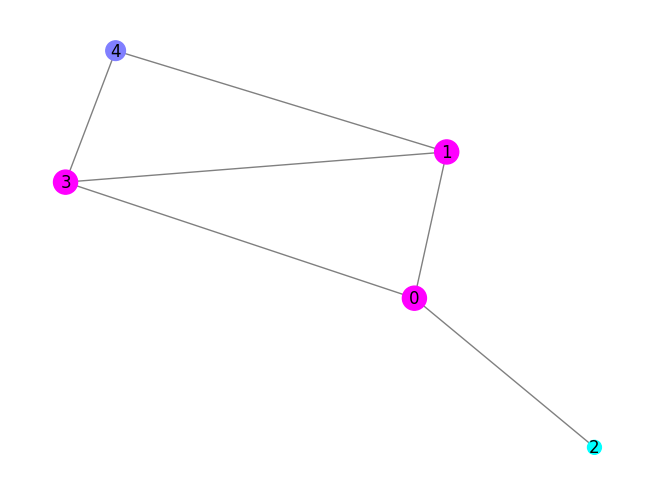

In [3]:
G = nx.barabasi_albert_graph(5,2)
# 绘制网络图，按度值大小设定节点大小和颜色
# 设置节点大小与度成正比
nodeSize = [G.degree(i)*100 for i in G.nodes()]
node_colors = [G.degree(i) for i in G.nodes()]
options = {
    'pos': nx.spring_layout(G),
    'node_size': nodeSize,
    'node_color': node_colors,
    'cmap': plt.cm.cool, # 设置节点colormap
    'edge_color': "gray",
    'with_labels': True,
}
nx.draw(G, **options)
plt.show()

## DFS

In [4]:
def DFS(graph, start):
    all = list(graph.nodes())
    done = []
    stack.push(start)
    print(f"当前栈状态: {stack}")
    
    while not stack.is_empty():
        topNode = stack.pop()
        print(f"    处理元素{topNode}")
        done.append(topNode)
        print(f"    已处理元素: {done}")
        if(set(done)==set(all)):
            print("处理完成。。。")
            return
        for node in graph.neighbors(topNode):
            if node in done or node in stack.items:
                continue
            stack.push(node)
        print(f"当前栈状态: {stack}")


stack = Stack()
numNodes = G.number_of_nodes()
start = list(G.nodes())[random.randint(0, numNodes-1)]
print(f"起始点: {start}")
DFS(G, start)

起始点: 2
当前栈状态: [2]
    处理元素2
    已处理元素: [2]
当前栈状态: [0]
    处理元素0
    已处理元素: [2, 0]
当前栈状态: [1, 3]
    处理元素3
    已处理元素: [2, 0, 3]
当前栈状态: [1, 4]
    处理元素4
    已处理元素: [2, 0, 3, 4]
当前栈状态: [1]
    处理元素1
    已处理元素: [2, 0, 3, 4, 1]
处理完成。。。


## BFS

In [5]:
def BFS(graph, start):
    all = list(graph.nodes())
    done = []
    queue.enqueue(start)
    print(f"当前栈状态: {queue}")
    
    while not queue.is_empty():
        firstNode = queue.dequeue()
        print(f"    处理元素{firstNode}")
        done.append(firstNode)
        print(f"    已处理元素: {done}")
        if(set(done)==set(all)):
            print("处理完成。。。")
            return
        for node in graph.neighbors(firstNode):
            if node in done or node in queue.items:
                continue
            queue.enqueue(node)
        print(f"当前栈状态: {queue}")


queue = Queue()
numNodes = G.number_of_nodes()
start = list(G.nodes())[random.randint(0, numNodes-1)]
print(f"起始点: {start}")
BFS(G, start)

起始点: 3
当前栈状态: [3]
    处理元素3
    已处理元素: [3]
当前栈状态: [0, 1, 4]
    处理元素0
    已处理元素: [3, 0]
当前栈状态: [1, 4, 2]
    处理元素1
    已处理元素: [3, 0, 1]
当前栈状态: [4, 2]
    处理元素4
    已处理元素: [3, 0, 1, 4]
当前栈状态: [2]
    处理元素2
    已处理元素: [3, 0, 1, 4, 2]
处理完成。。。
